## Titanic: Machine Learning from Disaster

In [1]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the datasets into the pandas DataFrame
train_file_address = 'train.csv'
train_df = pd.read_csv(train_file_address)
test_file_address = 'test.csv'
test_df = pd.read_csv(test_file_address)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Imputing the values of age bease on the median of the column of each class survived/not-survived.

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

train_df["Age"][train_df["Survived"] == 0] = train_df["Age"][train_df["Survived"] == 0].fillna(train_df["Age"][train_df["Survived"] == 0].median())
train_df["Age"][train_df["Survived"] == 1] = train_df["Age"][train_df["Survived"] == 1].fillna(train_df["Age"][train_df["Survived"] == 1].median())

In [7]:
# Since the feature Cabin has too many missing values, we are dropping it.
train_df = train_df.drop(['Cabin'], axis=1)

In [8]:
# Dropping other unnecessary features also.
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [9]:
train_df["Embarked"][train_df["Survived"] == 0] = train_df["Embarked"][train_df["Survived"] == 0].fillna(train_df["Embarked"][train_df["Survived"] == 0].mode()[0])
train_df["Embarked"][train_df["Survived"] == 1] = train_df["Embarked"][train_df["Survived"] == 1].fillna(train_df["Embarked"][train_df["Survived"] == 1].mode()[0])

In [10]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
test_df["Age"][train_df["Survived"] == 0] = test_df["Age"][train_df["Survived"] == 0].fillna(test_df["Age"][train_df["Survived"] == 0].median())
test_df["Age"][train_df["Survived"] == 1] = test_df["Age"][train_df["Survived"] == 1].fillna(test_df["Age"][train_df["Survived"] == 1].median())

In [12]:
test_df = test_df.drop(['Cabin'],axis=1)

In [13]:
test_df = test_df.fillna(test_df["Fare"].median())

In [14]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


In [15]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# Now we don't have any missing values.

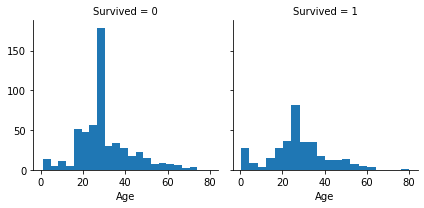

In [17]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

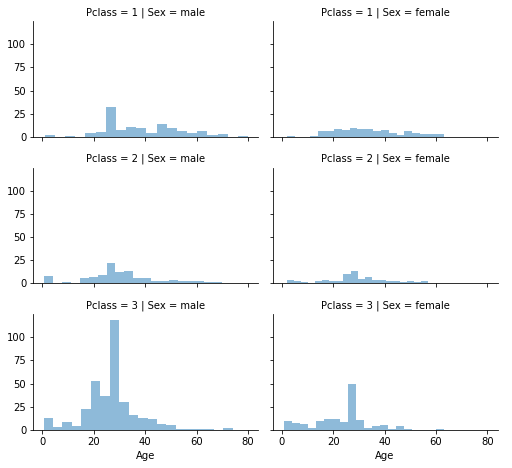

In [18]:
import seaborn as sns
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [19]:
# Now we convert the categorical values into numerical values.

In [20]:
train_df["Sex"][train_df["Sex"] == "male"] = 0
train_df["Sex"][train_df["Sex"] == "female"] = 1

In [21]:
train_df["Embarked"][train_df["Embarked"] == "S"] = 0
train_df["Embarked"][train_df["Embarked"] == "C"] = 1
train_df["Embarked"][train_df["Embarked"] == "Q"] = 2

In [22]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


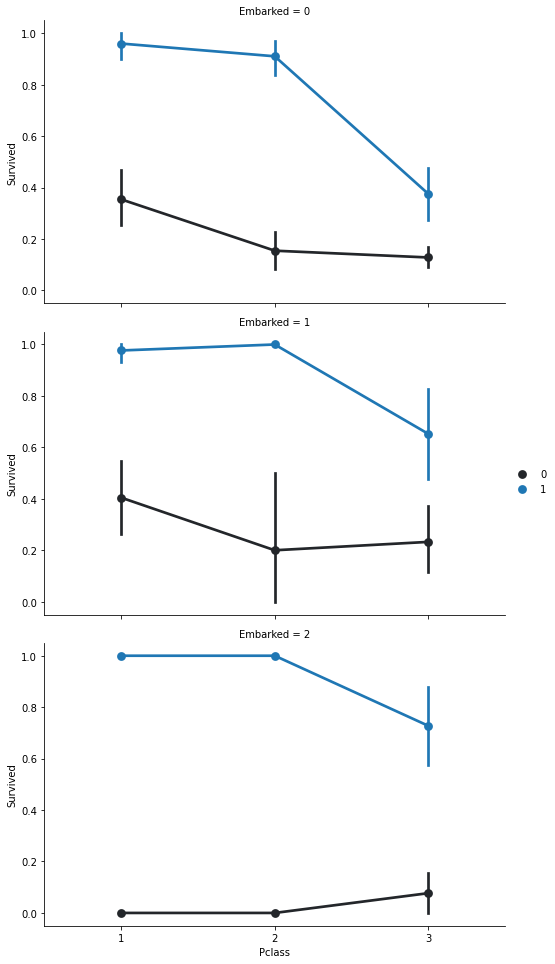

In [23]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

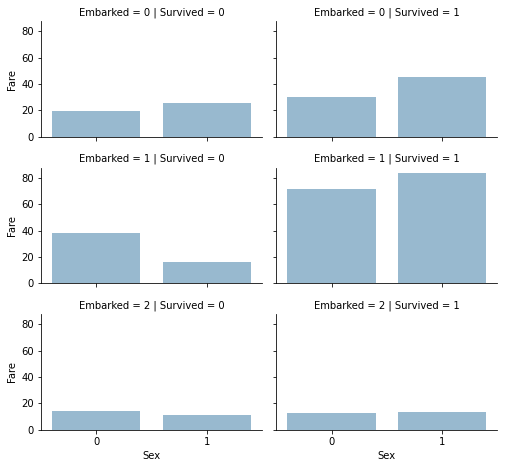

In [24]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order=None)
grid.add_legend()

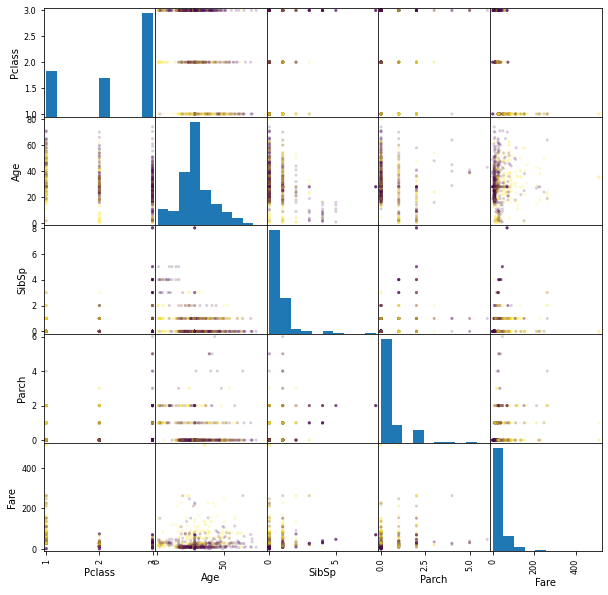

In [25]:
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
numeric_cols = train_df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
scatter_matrix(numeric_cols, c = train_df["Survived"] ,alpha = 0.2, figsize=(10,10), diagonal = 'hist')
plt.show()

In [26]:
test_df["Sex"][test_df["Sex"] == "male"] = 0
test_df["Sex"][test_df["Sex"] == "female"] = 1

In [27]:
test_df["Embarked"][test_df["Embarked"] == "S"] = 0
test_df["Embarked"][test_df["Embarked"] == "C"] = 1
test_df["Embarked"][test_df["Embarked"] == "Q"] = 2

In [28]:
from sklearn import preprocessing
X_train = train_df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
scaler = preprocessing.StandardScaler().fit(X_train)
y_train = train_df["Survived"]
X_test = test_df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

## Now fitting into the models.

Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, y_train) * 100
acc_decision_tree

97.97979797979798

Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = random_forest.score(X_train, y_train) * 100
acc_random_forest

97.8675645342312

Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = gaussian.score(X_train, y_train) * 100
acc_gaussian

79.2368125701459

Support Vector Machine

In [32]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, y_train) * 100
acc_svc

68.23793490460157

In [33]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, y_train) * 100
acc_decision_tree

97.97979797979798

In [34]:
submit = pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived": y_pred})
submit.to_csv('submission.csv', index=False)